In [14]:
import pandas as pd
import geopandas as gpd
import osmnx as ox
import numpy as np
import contextily as cx

import matplotlib.pyplot as plt

ox.config(log_console=True, use_cache=True)
ox.__version__

'0.15.1'

In [2]:
cities = pd.read_html("https://en.wikipedia.org/wiki/List_of_United_States_cities_by_population")
cities = cities[4]

cities = pd.DataFrame({'city': cities['City'].str.replace('\[.*\]', ''),
                       'state': cities['State[c]']})

In [3]:
cities.head()

,city,state
0,New York City,New York
1,Los Angeles,California
2,Chicago,Illinois
3,Houston,Texas
4,Phoenix,Arizona


In [4]:
import json
import googlemaps

with open("google.json", "r") as token:
    GOOGLE_KEY = json.load(token)["key"]
    
gmaps = googlemaps.Client(key=GOOGLE_KEY)

In [5]:
lats = list()
lons = list()

for i in np.arange(0, len(cities.city)):
    metro = cities['city'][i]
    state = cities['state'][i]
    
    location = f"City Hall, {metro}, {state}, USA"
    
    result = gmaps.geocode(location)

    lats.append(result[0]['geometry']['location']['lat'])
    lons.append(result[0]['geometry']['location']['lng'])

In [6]:
cities['lat'] = lats
cities['lon'] = lons

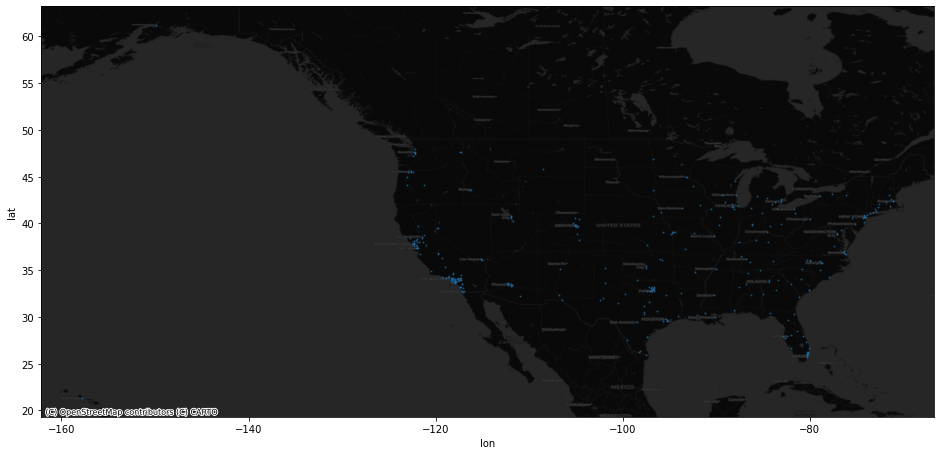

In [17]:
gdf = gpd.GeoDataFrame(cities, geometry=gpd.points_from_xy(cities.lon, cities.lat))

ax = cities.plot.scatter("lon", "lat", 
                         s=1, alpha=0.5,
                         figsize=(16, 10))

cx.add_basemap(ax, crs={'init': 'epsg:4326'},
               source=cx.providers.CartoDB.DarkMatter)

In [85]:
edges = list()
nodes = list()

for i in np.arange(0, cities.shape[0]):
    
    print(cities.city[i])
    
    G = ox.graph_from_point((cities['lat'][i], cities['lon'][i]), 
                            dist=1000, 
                            network_type='all')
    
    N, E = ox.graph_to_gdfs(G)
    
    N['city'] = cities.city[i]
    E['city'] = cities.city[i]
    
    nodes.append(N)
    edges.append(E)
    
edges = gpd.GeoDataFrame(pd.concat(edges, ignore_index=False))
nodes = gpd.GeoDataFrame(pd.concat(nodes, ignore_index=False))

New York City
Los Angeles
Chicago
Houston
Phoenix
Philadelphia
San Antonio
San Diego
Dallas
San Jose
Austin
Jacksonville
Fort Worth
Columbus
Charlotte
San Francisco
Indianapolis
Seattle
Denver
Washington
Boston
El Paso
Nashville
Detroit
Oklahoma City
Portland
Las Vegas
Memphis
Louisville
Baltimore
Milwaukee
Albuquerque
Tucson
Fresno
Mesa
Sacramento
Atlanta
Kansas City
Colorado Springs
Omaha
Raleigh
Miami
Long Beach
Virginia Beach
Oakland
Minneapolis
Tulsa
Tampa
Arlington
New Orleans
Wichita
Bakersfield
Cleveland
Aurora
Anaheim
Honolulu
Santa Ana
Riverside
Corpus Christi
Lexington
Henderson
Stockton
Saint Paul
Cincinnati
St. Louis
Pittsburgh
Greensboro
Lincoln
Anchorage
Plano
Orlando
Irvine
Newark
Durham
Chula Vista
Toledo
Fort Wayne
St. Petersburg
Laredo
Jersey City
Chandler
Madison
Lubbock
Scottsdale
Reno
Buffalo
Gilbert
Glendale
North Las Vegas
Winston–Salem
Chesapeake
Norfolk
Fremont
Garland
Irving
Hialeah
Richmond
Boise
Spokane
Baton Rouge
Tacoma
San Bernardino
Modesto
Fontana
Des 

In [88]:
edges = ox.io._stringify_nonnumeric_cols(edges)

nodes.to_file("nodes_us.gpkg", driver="GPKG")
edges.to_file("edges_us.gpkg", driver="GPKG")

In [100]:
nodes = gpd.read_file("nodes_us.gpkg")
edges = gpd.read_file("edges_us.gpkg")

In [103]:
street_widths = {'footway' : 0.5,
                 'steps' : 0.5,
                 'pedestrian' : 0.5,
                 'path' : 0.5,
                 'track' : 0.5,
                 'service' : 2,
                 'residential' : 3,
                 'primary' : 5,
                 'motorway' : 6}

In [128]:
edge_linewidths = []

for _, _, d in G.edges(keys=False, data=True):
    street_type = re.sub(r'\,.*', '', d["highway"])
    street_type = re.sub(r'\W+', '', street_type)
    
    if street_type in street_widths:
        edge_linewidths.append(street_widths[street_type])
    else:
        edge_linewidths.append(default_width)


footway
footway
footway
footway
service
secondary
service
footway
service
footway
secondary
footway
footway
service
tertiary
tertiary
service
footway
footway
service
tertiary
footway
footway
tertiary
tertiary
footway
footway
tertiary
service
tertiary
tertiary
service
service
footway
footway
service
tertiary
tertiary
tertiary
tertiary
footway
footway
service
service
footway
footway
tertiary
residential
tertiary
footway
footway
footway
footway
residential
residential
footway
footway
residential
secondary
residential
residential
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
residential
residential
footway
footway
footway
footway
footway
footway
secondary
residential
residential
footway
residential
residential
footway
secondary
secondary
footway
footway
secondary
secondary
secondary
secondary
secondary
service
footway
footway
footway
footway
footway
footway
footway
footway
motorway_link
footway
footway
tertiary
motorway_link
footway
footway
footway
footway

residential
residential
residential
residential
residential
residential
service
residential
secondary
residential
residential
residential
residential
residential
residential
residential
residential
residential
residential
footway
footway
footway
footway
footway
footway
tertiary
tertiary
footway
footway
footway
tertiary
footway
residential
residential
residential
residential
residential
residential
residential
service
footway
footway
footway
footway
footway
service
footway
footway
footway
secondary
secondary
footway
footway
secondary
secondary
secondary
secondary
service
footway
footway
footway
footway
footway
footway
footway
footway
tertiary
footway
footway
footway
footway
footway
footway
secondary
secondary
footway
footway
secondary
secondary
service
secondary
secondary
footway
footway
service
footway
footway
service
residential
residential
residential
residential
footway
footway
residential
footway
service
service
footway
service
service
service
service
service
service
footway
footwa

footway
footway
footway
footway
footway
footway
footway
residential
residential
secondary
residential
residential
footway
footway
secondary
footway
footway
secondary
footway
footway
secondary
secondary
secondary
footway
footway
footway
footway
secondary
residential
trunk
residential
residential
residential
residential
footway
footway
footway
residential
residential
footway
residential
residential
residential
footway
footway
footway
footway
footway
footway
footway
footway
secondary
secondary
secondary
secondary
secondary
footway
footway
footway
footway
secondary
residential
residential
tertiary
residential
footway
footway
residential
footway
residential
footway
residential
footway
footway
tertiary
tertiary
secondary
tertiary
footway
footway
secondary
footway
footway
tertiary
tertiary
footway
footway
footway
footway
residential
tertiary
secondary
secondary
tertiary
tertiary
residential
footway
footway
footway
footway
secondary
secondary
secondary
footway
footway
service
secondary
footway

footway
footway
footway
footway
tertiary
tertiary
footway
footway
footway
footway
footway
service
service
footway
footway
service
footway
service
service
tertiary
tertiary
service
service
service
footway
footway
service
service
service
service
tertiary
tertiary
service
service
footway
footway
service
service
service
service
tertiary
tertiary
footway
footway
footway
footway
footway
footway
footway
footway
footway
secondary
secondary
footway
footway
footway
footway
footway
footway
footway
footway
tertiary
tertiary
footway
footway
service
service
footway
footway
service
residential
residential
residential
service
service
service
service
service
footway
footway
footway
footway
footway
service
service
service
service
residential
residential
footway
footway
footway
service
service
footway
footway
residential
residential
footway
footway
footway
footway
footway
residential
residential
footway
footway
residential
secondary
residential
residential
footway
footway
secondary
service
residential
re

footway
footway
footway
footway
service
footway
footway
footway
footway
footway
footway
residential
residential
footway
footway
footway
footway
footway
footway
secondary
residential
residential
secondary
residential
residential
secondary
footway
footway
footway
footway
footway
footway
footway
secondary
footway
footway
footway
footway
footway
residential
residential
footway
residential
service
residential
service
service
footway
footway
service
tertiary
footway
footway
footway
footway
secondary
secondary
footway
footway
footway
footway
footway
footway
secondary
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
secondary
footway
footway
footway
motorway_link
motorway_link
motorway
motorway_link
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
residential
residential
footway
footway
footway
footway
footway
residential
residential
footway
footway
footway
footway
footway
resi

footway
service
service
footway
footway
tertiary
footway
footway
secondary
tertiary
secondary
footway
footway
footway
secondary
footway
secondary
footway
secondary
secondary
residential
residential
footway
footway
footway
tertiary
footway
footway
service
service
service
residential
tertiary
footway
footway
service
tertiary
service
primary
service
service
service
service
service
footway
service
service
footway
secondary
service
service
service
service
service
footway
footway
footway
secondary
footway
footway
service
service
service
service
service
service
service
service
service
footway
footway
service
service
residential
service
motorway
motorway
motorway
motorway_link
motorway
tertiary
footway
footway
motorway
motorway_link
motorway
primary
motorway_link
footway
footway
footway
motorway_link
motorway
footway
footway
footway
footway
footway
footway
footway
footway
tertiary
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
residential
residential
fo

service
service
service
service
service
service
service
service
service
footway
service
service
service
service
service
footway
service
service
footway
footway
footway
service
service
service
footway
service
service
footway
service
service
service
service
service
service
service
service
service
service
service
service
service
service
service
service
service
service
footway
footway
footway
footway
footway
footway
footway
footway
tertiary
footway
footway
footway
footway
footway
footway
footway
footway
service
service
footway
footway
footway
footway
footway
footway
tertiary
service
residential
residential
service
footway
footway
footway
footway
footway
footway
service
secondary
service
footway
service
footway
service
secondary
tertiary
footway
footway
footway
footway
footway
footway
footway
footway
service
footway
footway
service
secondary
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
footway
residential
residential

In [ ]:
import re

fig, axs = plt.subplots(8, 8, figsize=(20, 20), 
                        facecolor='k',
                        constrained_layout=True, 
                        subplot_kw=dict(aspect='equal'))

axs = axs.ravel()

for i in np.arange(0, 64):
    
    city = cities.city[i]
    
    node = nodes[nodes['city']==city]
    edge = edges[edges['city']==city]
    
    G = ox.graph_from_gdfs(node, edge)
    
    edge_linewidths = []
    
    default_width = 0.5
    
    for _, _, d in G.edges(keys=False, data=True):
        street_type = d["highway"][0] if isinstance(d["highway"], list) else d["highway"]
        if street_type in street_widths:
            edge_linewidths.append(street_widths[street_type])
        else:
            edge_linewidths.append(default_width)
    
    edge.plot(ax=axs[i], color='w', lw=edge_linewidths)
    
    bbox = ox.utils_geo.bbox_from_point((cities['lat'][i], cities['lon'][i]), 800, project_utm=False)
    
    north, south, east, west = bbox
    axs[i].set_ylim((south, north))
    axs[i].set_xlim((west, east))
    axs[i].set_title(cities['city'][i], color='w', weight='bold')

    axs[i].margins(0)
    axs[i].axis('off')
    
fig.suptitle('Urban Morphology in American Cities', color='w', size=20, weight='bold')
fig.savefig('urban-morphology.png', facecolor=fig.get_facecolor(), dpi=120, bbox_inches='tight')

KeyboardInterrupt: 

In [120]:
def reverse_bearing(x):
    return x + 180 if x < 180 else x - 180

In [161]:
import datetime

weight_by_length = False

bearings = {}

for i in np.arange(0, len(cities.city[:64])):
    print(datetime.datetime.now(), cities.city[i])
    
    name = cities.city[i]
    
    G = ox.graph_from_point((cities['lat'][i], cities['lon'][i]), 
                            dist=1000, 
                            network_type='all')
    
    U = ox.add_edge_bearings(ox.get_undirected(G))
    
    if weight_by_length:
        
        city_bearings = []
        for u, v, k, d in U.edges(keys=True, data=True):
            city_bearings.extend([d['bearing']] * int(d['length']))
        b = pd.Series(city_bearings)
        bearings[name] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')
        
    else:
        
        b = pd.Series([d['bearing'] for u, v, k, d in U.edges(keys=True, data=True)])
        bearings[i] = pd.concat([b, b.map(reverse_bearing)]).reset_index(drop='True')

2020-11-18 17:21:52.898964 New York City
2020-11-18 17:22:02.709006 Los Angeles
2020-11-18 17:22:08.555674 Chicago
2020-11-18 17:22:16.952688 Houston
2020-11-18 17:22:25.238956 Phoenix
2020-11-18 17:22:29.357728 Philadelphia
2020-11-18 17:22:40.746926 San Antonio
2020-11-18 17:22:50.979124 San Diego
2020-11-18 17:22:58.155385 Dallas
2020-11-18 17:23:13.620751 San Jose
2020-11-18 17:23:27.732547 Austin
2020-11-18 17:23:40.648453 Jacksonville
2020-11-18 17:23:53.791217 Fort Worth
2020-11-18 17:24:02.686232 Columbus
2020-11-18 17:24:13.744500 Charlotte
2020-11-18 17:24:19.398160 San Francisco
2020-11-18 17:24:38.012224 Indianapolis
2020-11-18 17:24:48.582083 Seattle
2020-11-18 17:25:03.157596 Denver
2020-11-18 17:25:24.842875 Washington
2020-11-18 17:25:35.587433 Boston
2020-11-18 17:25:51.657400 El Paso
2020-11-18 17:25:58.465009 Nashville
2020-11-18 17:26:08.091802 Detroit
2020-11-18 17:26:20.412405 Oklahoma City
2020-11-18 17:26:31.613989 Portland
2020-11-18 17:26:45.473018 Las Vegas
2

In [162]:
def count_and_merge(n, bearings):
    
    n = n * 2
    bins = np.arange(n + 1) * 360 / n
    count, _ = np.histogram(bearings, bins=bins)
    
    count = np.roll(count, 1)
    return count[::2] + count[1::2]

In [187]:
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors

mpl.rcParams.update({'text.color':"white",
                     'axes.labelcolor':"white"})

def polar_plot(ax, bearings, n=36, title=''):

    bins = np.arange(n + 1) * 360 / n
    count = count_and_merge(n, bearings)
    _ , division = np.histogram(bearings, bins=bins)
    frequency = count / count.sum()
    division = division[0:-1]
    width =  2 * np.pi / n

    ax.set_theta_zero_location('N')
    ax.set_theta_direction('clockwise')

    x = division * np.pi / 180
    bars = ax.bar(x, height=frequency, width=width, align='center', bottom=0, zorder=2, 
                  color='w', edgecolor='w', linewidth=0.1, alpha=1)
    
    ax.set_ylim(top=frequency.max())
    
    title_font = {'weight':'bold'}
    xtick_font = {'weight':'bold', 'alpha':1.0, 'zorder':3}
    ytick_font = {'weight':'bold', 'alpha':0.2, 'zorder':3}
    
    ax.set_title(title.upper(), y=1.05, fontdict=title_font)
    
    ax.set_facecolor('k')
    
    ax.set_yticks(np.linspace(0, max(ax.get_ylim()), 5))
    yticklabels = ['{:.2f}'.format(y) for y in ax.get_yticks()]
    yticklabels[0] = ''
    ax.set_yticklabels(labels=yticklabels, fontdict=ytick_font)
    
    xticklabels = ['N', '', 'E', '', 'S', '', 'W', '']
    ax.set_xticklabels(labels=xticklabels, fontdict=xtick_font)
    ax.tick_params(axis='x', which='major', pad=-2)

In [164]:
cities['key'] = pd.Series(np.array(list(bearings.keys())), dtype = 'int')
cities.head()

,city,state,lat,lon,geometry,key
0,New York City,New York,40.713524,-74.006710,POINT (-74.00671 40.71352),0.0
1,Los Angeles,California,34.053714,-118.242653,POINT (-118.24265 34.05371),1.0
2,Chicago,Illinois,41.883823,-87.632078,POINT (-87.63208 41.88382),2.0
3,Houston,Texas,29.760159,-95.369418,POINT (-95.36942 29.76016),3.0
4,Phoenix,Arizona,33.439971,-112.204870,POINT (-112.20487 33.43997),4.0


In [166]:
keys = np.array(list(bearings.keys()))

plots = keys[0:64]
reset = cities.set_index('key')

trim = reset.loc[keys, :]

/Users/andrewrenninger/anaconda3/envs/musa-550-fall-2020/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


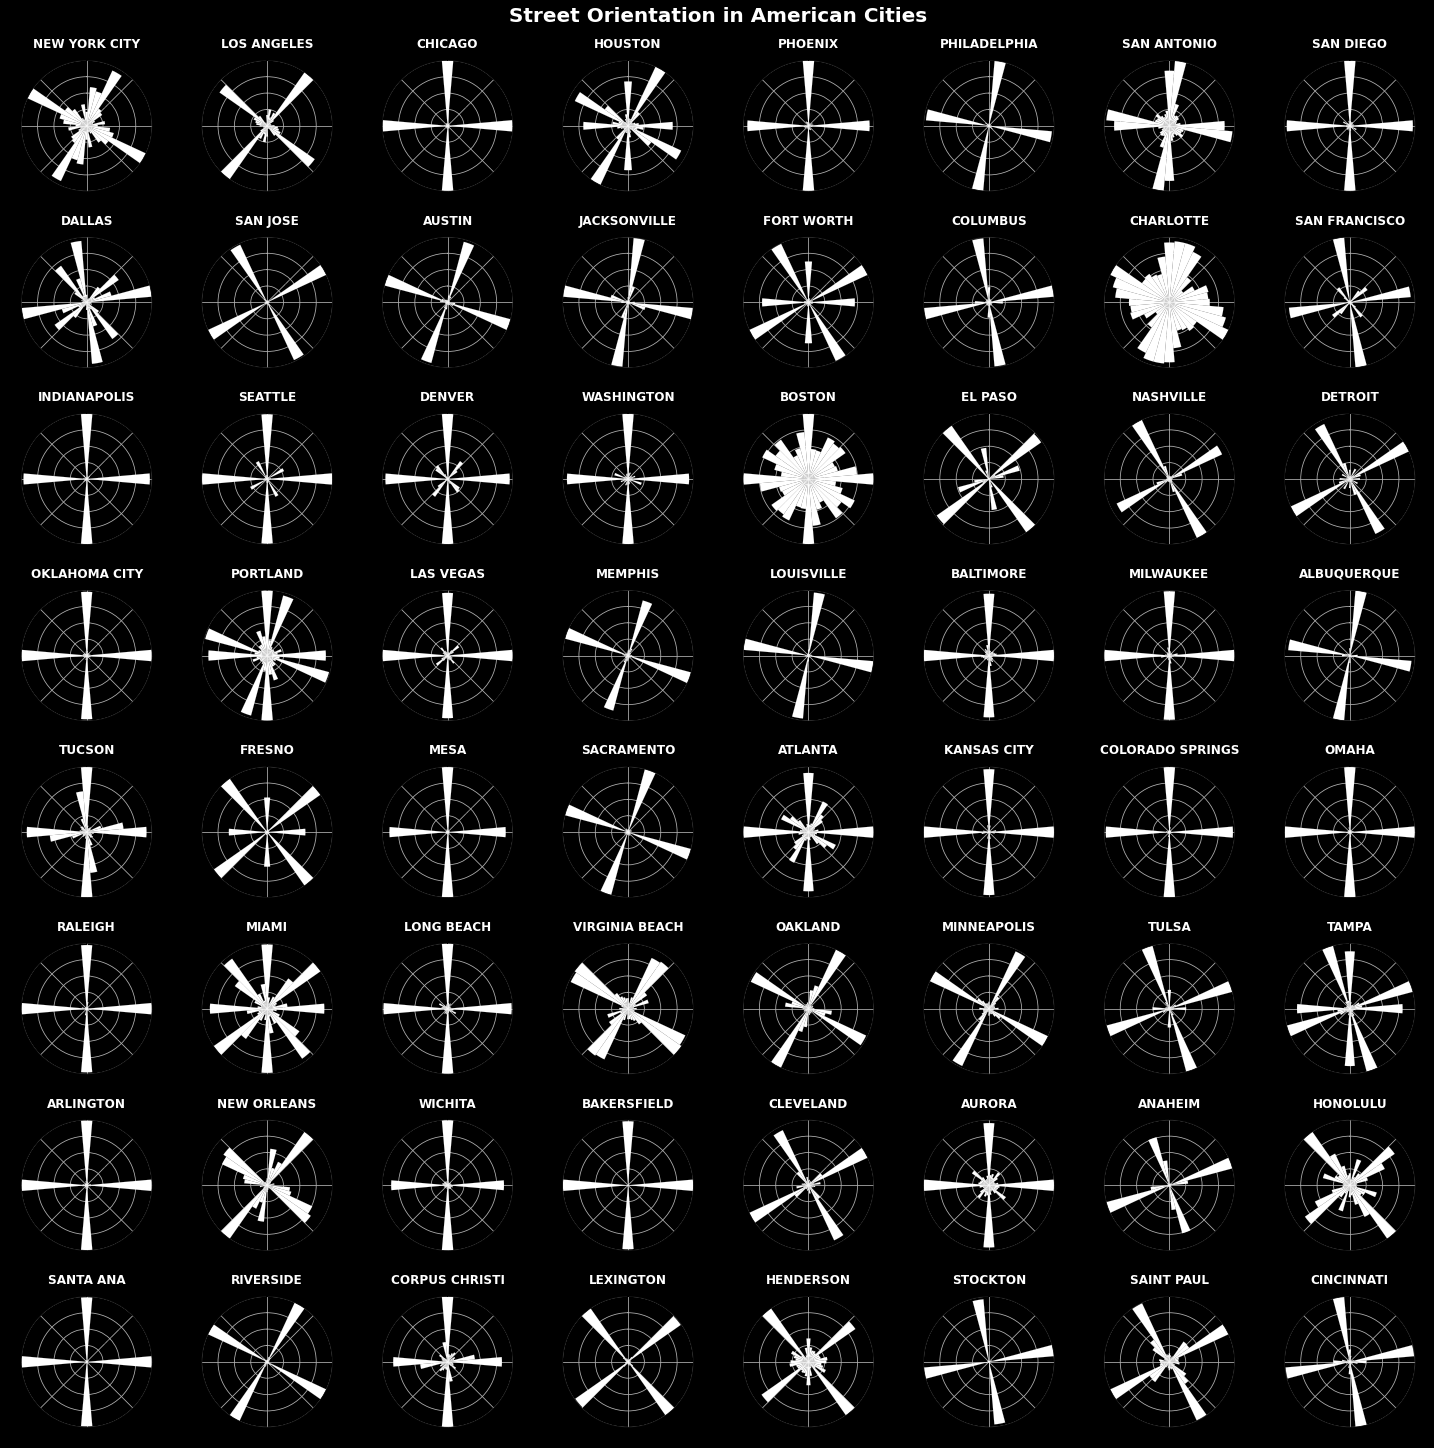

In [213]:
n = 64
ncols = int(np.ceil(np.sqrt(n)))
nrows = int(np.ceil(n / ncols))
figsize = (ncols * 5, nrows * 5)
fig, axs = plt.subplots(nrows, ncols, 
                        facecolor='k',
                        figsize=(20,20), 
                        constrained_layout=True, 
                        subplot_kw={'projection':'polar',
                                    'aspect': 'equal'})

for ax, city in zip(axs.flat, plots):
    polar_plot(ax, bearings[city], title=trim.city[city])

fig.suptitle('Street Orientation in American Cities', color='w', size=20, weight='bold')
fig.savefig('urban-orientation.png', facecolor=fig.get_facecolor(), dpi=120, bbox_inches='tight')

In [ ]:
def plot_figure_ground(
    G=None,
    address=None,
    point=None,
    dist=805,
    network_type="drive_service",
    street_widths=None,
    default_width=4,
    figsize=(8, 8),
    edge_color="w",
    smooth_joints=True,
    **pg_kwargs,
):
    """
    Plot a figure-ground diagram of a street network.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph, must be unprojected
    address : string
        address to geocode as the center point if G is not passed in
    point : tuple
        center point if address and G are not passed in
    dist : numeric
        how many meters to extend north, south, east, west from center point
    network_type : string
        what type of network to get
    street_widths : dict
        dict keys are street types and values are widths to plot in pixels
    default_width : numeric
        fallback width in pixels for any street type not in street_widths
    figsize : numeric
        (width, height) of figure, should be equal
    edge_color : string
        color of the edges' lines
    smooth_joints : bool
        if True, plot nodes same width as streets to smooth line joints and
        prevent cracks between them from showing
    pg_kwargs
        keyword arguments to pass to plot_graph
    Returns
    -------
    fig, ax : tuple
        matplotlib figure, axis
    """
    multiplier = 1.2

    # if user did not pass in custom street widths, create a dict of defaults
    if street_widths is None:
        street_widths = {
            "footway": 1.5,
            "steps": 1.5,
            "pedestrian": 1.5,
            "service": 1.5,
            "path": 1.5,
            "track": 1.5,
            "motorway": 6,
        }

    # if G was passed in, plot it centered on its node centroid
    if G is not None:
        gdf_nodes = utils_graph.graph_to_gdfs(G, edges=False, node_geometry=True)
        lnglat_point = gdf_nodes.unary_union.centroid.coords[0]
        point = tuple(reversed(lnglat_point))

    # otherwise get network by address or point (whichever was passed) using a
    # dist multiplier to ensure we get more than enough network. simplify in
    # non-strict mode to not combine multiple street types into single edge
    elif address is not None:
        G, point = graph.graph_from_address(
            address,
            dist=dist * multiplier,
            dist_type="bbox",
            network_type=network_type,
            simplify=False,
            truncate_by_edge=True,
            return_coords=True,
        )
        G = simplification.simplify_graph(G, strict=False)
    elif point is not None:
        G = graph.graph_from_point(
            point,
            dist=dist * multiplier,
            dist_type="bbox",
            network_type=network_type,
            simplify=False,
            truncate_by_edge=True,
        )
        G = simplification.simplify_graph(G, strict=False)
    else:
        raise ValueError("You must pass an address or lat-lng point or graph.")

    # we need an undirected graph to find every edge incident to a node
    Gu = utils_graph.get_undirected(G)

    # for each edge, get a linewidth according to street type
    edge_linewidths = []
    for _, _, d in Gu.edges(keys=False, data=True):
        street_type = d["highway"][0] if isinstance(d["highway"], list) else d["highway"]
        if street_type in street_widths:
            edge_linewidths.append(street_widths[street_type])
        else:
            edge_linewidths.append(default_width)

    if smooth_joints:
        # for each node, get a nodesize according to the narrowest incident edge
        node_widths = dict()
        for node in Gu.nodes():
            # first, identify all the highway types of this node's incident edges
            ie_data = [Gu.get_edge_data(node, nbr) for nbr in Gu.neighbors(node)]
            edge_types = [d[min(d)]["highway"] for d in ie_data]
            if len(edge_types) < 1:
                # if node has no incident edges, make size zero
                node_widths[node] = 0
            else:
                # flatten the list of edge types
                et_flat = []
                for et in edge_types:
                    if isinstance(et, list):
                        et_flat.extend(et)
                    else:
                        et_flat.append(et)

                # lookup corresponding width for each edge type in flat list
                edge_widths = [
                    street_widths[et] if et in street_widths else default_width for et in et_flat
                ]

                # node diameter should equal largest edge width to make joints
                # perfectly smooth. alternatively use min(?) to prevent
                # anything larger from extending past smallest street's line.
                # circle marker sizes are in area, so use diameter squared.
                circle_diameter = max(edge_widths)
                circle_area = circle_diameter ** 2
                node_widths[node] = circle_area

        # assign the node size to each node in the graph
        node_sizes = [node_widths[node] for node in Gu.nodes()]
    else:
        node_sizes = 0

    # define the view extents of the plotting figure
    bbox = utils_geo.bbox_from_point(point, dist, project_utm=False)

    # plot the figure
    override = {"bbox", "node_size", "node_color", "edge_linewidth"}
    kwargs = {k: v for k, v in pg_kwargs.items() if k not in override}
    fig, ax = plot_graph(
        G=Gu,
        bbox=bbox,
        figsize=figsize,
        node_size=node_sizes,
        node_color=edge_color,
        edge_color=edge_color,
        edge_linewidth=edge_linewidths,
        **kwargs,
    )
    return fig, ax

In [ ]:
def plot_graph(
    G,
    ax=None,
    figsize=(8, 8),
    bgcolor="#111111",
    node_color="w",
    node_size=15,
    node_alpha=None,
    node_edgecolor="none",
    node_zorder=1,
    edge_color="#999999",
    edge_linewidth=1,
    edge_alpha=None,
    show=True,
    close=False,
    save=False,
    filepath=None,
    dpi=300,
    bbox=None,
):
    """
    Plot a graph.
    Parameters
    ----------
    G : networkx.MultiDiGraph
        input graph
    ax : matplotlib axis
        if not None, plot on this preexisting axis
    figsize : tuple
        if ax is None, create new figure with size (width, height)
    bgcolor : string
        background color of plot
    node_color : string or list
        color(s) of the nodes
    node_size : int
        size of the nodes: if 0, then skip plotting the nodes
    node_alpha : float
        opacity of the nodes, note: if you passed RGBA values to node_color,
        set node_alpha=None to use the alpha channel in node_color
    node_edgecolor : string
        color of the nodes' markers' borders
    node_zorder : int
        zorder to plot nodes: edges are always 1, so set node_zorder=0 to plot
        nodes below edges
    edge_color : string or list
        color(s) of the edges' lines
    edge_linewidth : float
        width of the edges' lines: if 0, then skip plotting the edges
    edge_alpha : float
        opacity of the edges, note: if you passed RGBA values to edge_color,
        set edge_alpha=None to use the alpha channel in edge_color
    show : bool
        if True, call pyplot.show() to show the figure
    close : bool
        if True, call pyplot.close() to close the figure
    save : bool
        if True, save the figure to disk at filepath
    filepath : string
        if save is True, the path to the file. file format determined from
        extension. if None, use settings.imgs_folder/image.png
    dpi : int
        if save is True, the resolution of saved file
    bbox : tuple
        bounding box as (north, south, east, west). if None, will calculate
        from spatial extents of plotted geometries.
    Returns
    -------
    fig, ax : tuple
        matplotlib figure, axis
    """
    max_node_size = max(node_size) if hasattr(node_size, "__iter__") else node_size
    max_edge_lw = max(edge_linewidth) if hasattr(edge_linewidth, "__iter__") else edge_linewidth
    if max_node_size <= 0 and max_edge_lw <= 0:
        raise ValueError("Either node_size or edge_linewidth must be > 0 to plot something.")

    # create fig, ax as needed
    utils.log("Begin plotting the graph...")
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, facecolor=bgcolor, frameon=False)
        ax.set_facecolor(bgcolor)
    else:
        fig = ax.figure

    if max_edge_lw > 0:
        # plot the edges' geometries
        gdf_edges = utils_graph.graph_to_gdfs(G, nodes=False)["geometry"]
        ax = gdf_edges.plot(ax=ax, color=edge_color, lw=edge_linewidth, alpha=edge_alpha, zorder=1)

    if max_node_size > 0:
        # scatter plot the nodes' x/y coordinates
        gdf_nodes = utils_graph.graph_to_gdfs(G, edges=False, node_geometry=False)[["x", "y"]]
        ax.scatter(
            x=gdf_nodes["x"],
            y=gdf_nodes["y"],
            s=node_size,
            c=node_color,
            alpha=node_alpha,
            edgecolor=node_edgecolor,
            zorder=node_zorder,
        )

    # get spatial extents from bbox parameter or the edges' geometries
    padding = 0
    if bbox is None:
        try:
            west, south, east, north = gdf_edges.total_bounds
        except NameError:
            west, south = gdf_nodes.min()
            east, north = gdf_nodes.max()
        bbox = north, south, east, west
        padding = 0.02  # pad 2% to not cut off peripheral nodes' circles

    # configure axis appearance, save/show figure as specified, and return
    ax = _config_ax(ax, G.graph["crs"], bbox, padding)
    fig, ax = _save_and_show(fig, ax, save, show, close, filepath, dpi)
    utils.log("Finished plotting the graph")
    return fig, ax

In [ ]:
def _config_ax(ax, crs, bbox, padding):
    """
    Configure axis for display.
    Parameters
    ----------
    ax : matplotlib axis
        the axis containing the plot
    crs : dict or string or pyproj.CRS
        the CRS of the plotted geometries
    bbox : tuple
        bounding box as (north, south, east, west)
    padding : float
        relative padding to add around the plot's bbox
    Returns
    -------
    ax : matplotlib axis
        the configured/styled axis
    """
    # set the axis view limits to bbox + relative padding
    north, south, east, west = bbox
    padding_ns = (north - south) * padding
    padding_ew = (east - west) * padding
    ax.set_ylim((south - padding_ns, north + padding_ns))
    ax.set_xlim((west - padding_ew, east + padding_ew))

    # set margins to zero, point ticks inward, turn off ax border and x/y axis
    # so there is no space around the plot
    ax.margins(0)
    ax.tick_params(which="both", direction="in")
    _ = [s.set_visible(False) for s in ax.spines.values()]
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # set aspect ratio
    if crs == settings.default_crs:
        # if data are not projected, conform aspect ratio to not stretch plot
        coslat = np.cos((south + north) / 2.0 / 180.0 * np.pi)
        ax.set_aspect(1.0 / coslat)
    else:
        # if projected, make everything square
        ax.set_aspect("equal")

    return ax

In [208]:
world = pd.read_html("https://en.wikipedia.org/wiki/List_of_countries_by_largest_and_second_largest_cities")
world = world[0]

In [210]:
world.columns = ['country', 'first', 'second', 'source']
world = world.drop('source', axis=1)

world.head()

,country,first,second
0,Abkhazia,Sukhumi,Tkvarcheli
1,Afghanistan,Kabul,Kandahar
2,Akrotiri and Dhekelia (UK),Episkopi Cantonment,Ayios Nikolaos
3,Åland Islands (Finland),Mariehamn,Jomala
4,Albania,Tirana,Durrës
